In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("Data_Science_Internship - Dump.csv")

In [3]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.shape

(46608, 16)

In [5]:
df['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [6]:
values = ['IMPORTANT','OPPORTUNITY','CONTACTED','PROCESSING']
#drop rows that contain any value in the list
df = df[df.status.isin(values) == False]

In [7]:
df.shape

(46317, 16)

In [8]:
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.nan)

In [9]:
df.shape

(46317, 16)

In [10]:
np.where(df == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' )

(array([], dtype=int64), array([], dtype=int64))

In [11]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [12]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Unnamed: 0'], dtype='object')

In [13]:
df.drop("Unnamed: 0",inplace = True, axis = 1)

In [14]:
df.shape

(46317, 15)

In [15]:
df.isnull().sum()

Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country     8622
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
room_type         23491
lead_id               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46317 non-null  object
 1   status          46317 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42623 non-null  object
 4   lease           43981 non-null  object
 5   movein          32707 non-null  object
 6   source          40366 non-null  object
 7   source_city     37486 non-null  object
 8   source_country  37695 non-null  object
 9   utm_source      46256 non-null  object
 10  utm_medium      43133 non-null  object
 11  des_city        43788 non-null  object
 12  des_country     43788 non-null  object
 13  room_type       22826 non-null  object
 14  lead_id         46317 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [17]:
df.describe()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
count,46317,46317,43244,42623,43981,32707,40366,37486,37695,46256,43133,43788,43788,22826,46317
unique,120,2,30,1851,311,469,682,4315,184,34,63,219,14,5,30491
top,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,93c256d77b219e1ae23da9b1d016bf5f718d4cfaa21667...
freq,8186,43244,8892,9750,11000,2450,19092,3020,18667,30873,31502,7323,42391,12379,2


In [18]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [19]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
movein            29.38
source            12.85
source_city       19.07
source_country    18.62
utm_source         0.13
utm_medium         6.87
des_city           5.46
des_country        5.46
room_type         50.72
lead_id            0.00
dtype: float64

In [20]:
df.shape

(46317, 15)

In [21]:
# Now we will take care of null values in each column one by one.

In [22]:
df['room_type'].describe()

count       22826
unique          5
top       Ensuite
freq        12379
Name: room_type, dtype: object

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

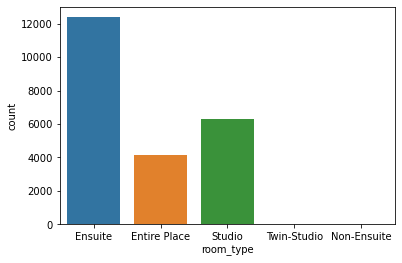

In [23]:
sns.countplot(df['room_type'])

In [24]:
#dropping cols with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5432\1306352683.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(i, 1, inplace = True)


In [25]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [26]:
#checking null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
movein            29.38
source            12.85
source_city       19.07
source_country    18.62
utm_source         0.13
utm_medium         6.87
des_city           5.46
des_country        5.46
lead_id            0.00
dtype: float64

In [27]:
#checking value counts of Country column

df['source_country'].value_counts(dropna=False)

e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    18667
NaN                                                                  8622
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2     6955
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f     2008
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac      992
                                                                    ...  
1dee9c9358d9460f0b5c2d61bca9607f5510ffff6e3bf6450f45a06e4d13ae56        1
7ad38f505923bc53112ecf77e03b2e71f9d749face6297a77cab2b758c6a6a65        1
e2567312ec53232b5353c2798f8054759ee21b03af967265dd22b4cb4284bc49        1
218d4c5d1c3c1c7df9f50a1bb3403a74257c05d4de15ac77f3ba57748fea49ca        1
282a5dbb9d8cb1ea0caf847b5aaca66cf1a76b5e57ddbbd2dd7db8204f553c5c        1
Name: source_country, Length: 185, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


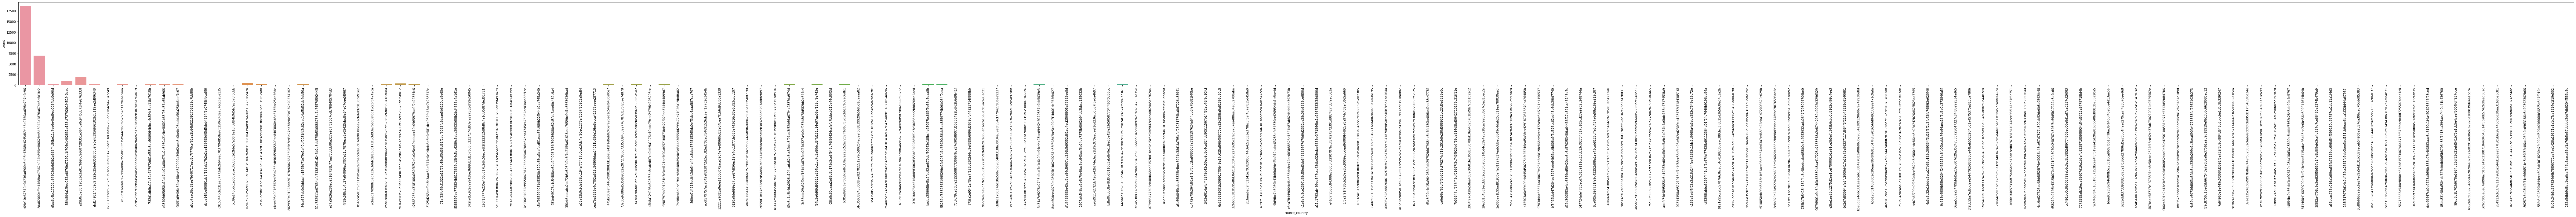

In [28]:
#plotting spread of Country columnn 
plt.figure(figsize=(150,5))
s1=sns.countplot(df.source_country)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
df.value_counts()

Agent_id                                                          status  lost_reason                  budget                lease                                       movein    source                                                            source_city                                                       source_country                                                    utm_source                                                        utm_medium                                                        des_city                                                          des_country                                                       lead_id                                                         
04d19fde0a08b17aca69491e714bea43565384d12a63626e08477662cc03780e  LOST    Low budget                   £121 - £180 Per Week  Semester Stay 20 - 24 weeks                 29/07/22  7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8  1b4e390dcd79bc05931bc4a080340fff0ed6eab8c34760043

In [30]:
# Since e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96 is the most common occurence among the non-missing values we can impute all missing values with India

df['source_country'] = df['source_country'].replace(np.nan,'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96')

In [31]:
df.isnull().sum()

Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country        0
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
lead_id               0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


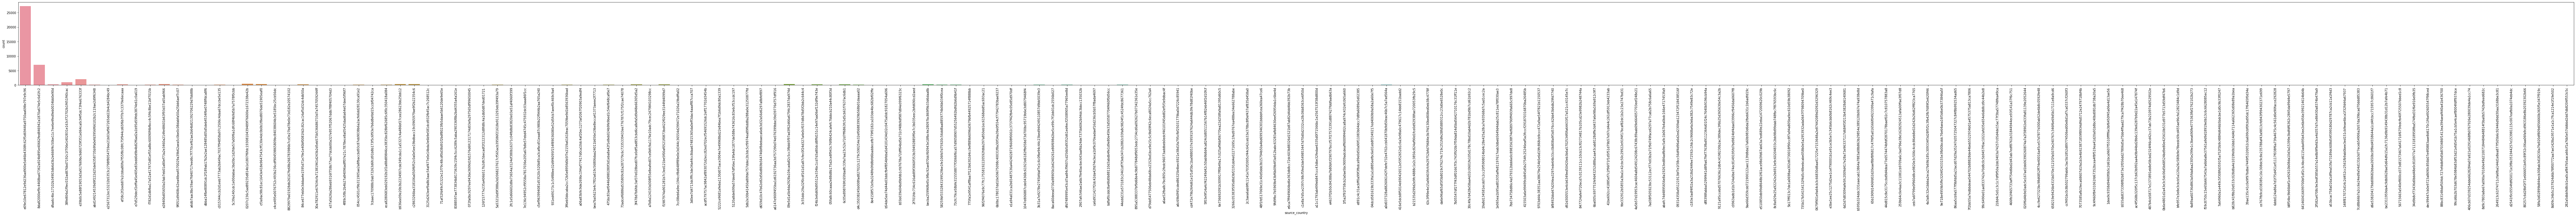

In [32]:
#plotting spread of Country columnn 
plt.figure(figsize=(150,5))
s1=sns.countplot(df.source_country)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## As we can see the Number of Values for e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96 are quite high (nearly 97% of the Data), this column can be dropped

In [33]:
#creating a list of columns to be droppped

cols_to_drop=['source_country']

In [34]:
#checking value counts of "City" column

df['source_city'].value_counts(dropna=False)

NaN                                                                 8831
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    3020
b384863fa1f6e091164b74219726eee0b9dd47776b91a4dc71fd0516630d21ec    1431
9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f418c5d76f12d191f02     854
7d1550b844ff586a6023216c06263105eed0a849a2a1f69bb8862ab288d8cdab     752
                                                                    ... 
67e6f8c1f6f47e01ab6fe1cbbc3d4115d71f63c6ebf82a8713a6ac04a5b5236c       1
c2cedb3b32de2ae419a258d76f4fa82ee302441fbae041acf9a13770dfa18eb0       1
e2f36920bce1be5e4c94b165dcbd09cf454f5990d8869c5cc483e0723e34595c       1
06065eeea31a9f7eeaf11e335f9a6a67235fc40f12d50b06b84fcbcb5ed70dd2       1
d650065b53c2284b98e575d37e1be820599bf33baff5e147770547a984975d2f       1
Name: source_city, Length: 4316, dtype: int64

In [35]:
df['source_city'] = df['source_city'].replace(np.nan,'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7 ')

In [36]:
#checking null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
movein            29.38
source            12.85
source_city        0.00
source_country     0.00
utm_source         0.13
utm_medium         6.87
des_city           5.46
des_country        5.46
lead_id            0.00
dtype: float64

In [37]:
#checking value counts of Specialization column

df['movein'].value_counts(dropna=False)

NaN         13610
10/09/22     2450
31/08/22     2187
01/09/22     2118
09/09/22     1563
            ...  
26/04/23        1
10/06/23        1
05/01/24        1
06/09/06        1
06/06/23        1
Name: movein, Length: 470, dtype: int64

In [38]:
df['movein'] = df['movein'].replace(np.nan, 'Not Specified')

In [39]:
#checking value counts of Specialization column

df['movein'].value_counts(dropna=False)

Not Specified    13610
10/09/22          2450
31/08/22          2187
01/09/22          2118
09/09/22          1563
                 ...  
26/04/23             1
10/06/23             1
05/01/24             1
06/09/06             1
06/06/23             1
Name: movein, Length: 470, dtype: int64

In [40]:
df = df.astype('category')

In [41]:
df = df.loc[:, df.nunique() > 1]

In [42]:
df.shape

(46317, 14)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


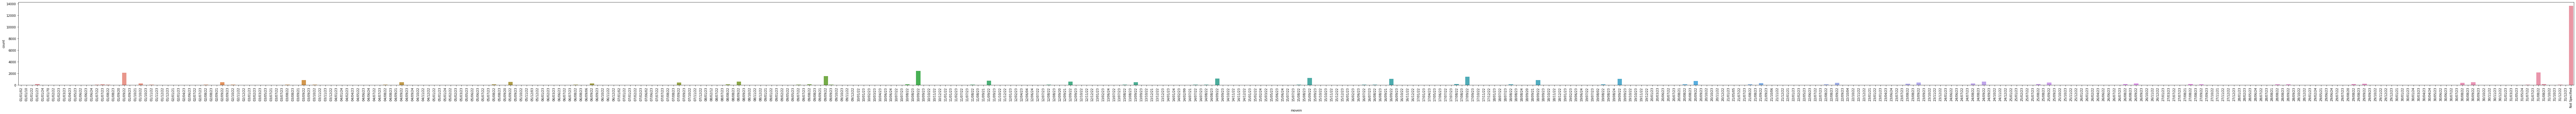

In [43]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(150,5))
s1=sns.countplot(df.movein)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
df.isnull().sum()

Agent_id             0
status               0
lost_reason       3073
budget            3694
lease             2336
movein               0
source            5951
source_city          0
source_country       0
utm_source          61
utm_medium        3184
des_city          2529
des_country       2529
lead_id              0
dtype: int64

In [45]:
df["lost_reason"].fillna(method = "ffill",inplace=True)

In [46]:
df["budget"].fillna(method = "ffill",inplace=True)
df["lease"].fillna(method = "ffill",inplace=True)
df["source"].fillna(method = "ffill",inplace=True)
df["utm_medium"].fillna(method = "ffill",inplace=True)
df["des_city"].fillna(method = "ffill",inplace=True)
df["utm_source"].fillna(method = "ffill",inplace=True)
df["des_country"].fillna(method = "ffill",inplace=True)

In [47]:
df.isnull().sum()

Agent_id          0
status            0
lost_reason       0
budget            2
lease             2
movein            0
source            2
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
lead_id           0
dtype: int64

In [48]:
df.dropna(inplace = True)

In [49]:
df.shape

(46315, 14)

In [50]:
df.isnull().sum()

Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
lead_id           0
dtype: int64

In [51]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,0-0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...


In [52]:
df["status"].value_counts()

LOST    43242
WON      3073
Name: status, dtype: int64

## Dummy Variable Creation:

In [53]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['category']).columns
cat_cols

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'lead_id'],
      dtype='object')

In [54]:
#status = pd.get_dummies(df['status'])

In [55]:
#df = df.drop('status', axis = 1)

In [56]:
#df = pd.concat([df,status], axis = 1)

In [57]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,0-0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...


In [58]:
#df['budget'] = df['budget'].apply(lambda x: re.sub('[^0-9.-]+', '', x))

In [59]:
import re

In [60]:
#df['budget'].value_counts()

In [61]:
# df['budget'] = df['budget'].replace(regex={r'0-0': '0'})

In [62]:
#df['budget'].value_counts()

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
one = OneHotEncoder()

In [65]:
df['budget'].value_counts().head(20)

£60 - £120 Per week     10538
£121 - £180 Per Week     9589
0-0                      6247
£181 - £240 Per Week     2301
100                      1645
150                      1177
£241 - £300 Per week      759
> 300£ Per Week           734
200                       723
120                       596
130                       457
160                       422
110                       404
140                       390
180                       387
250                       345
170                       315
300                       307
500                       279
190                       241
Name: budget, dtype: int64

In [66]:
top_10 = [x for x in df['budget'].value_counts().sort_values(ascending = False).head(10).index]
top_10

['£60 - £120 Per week',
 '£121 - £180 Per Week',
 '0-0',
 '£181 - £240 Per Week',
 '100',
 '150',
 '£241 - £300 Per week',
 '> 300£ Per Week',
 '200',
 '120']

In [69]:
for label in top_10:
    df[label] = np.where(df['budget'] == label,1,0)
    df[['budget']+top_10]

In [70]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,...,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,0,1,0,0,0,0,0,0,0,0
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,0,0,1,0,0,0,0,0,0,0
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,0-0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,...,0,0,1,0,0,0,0,0,0,0
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,...,0,0,0,0,0,0,0,0,0,1
6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,...,0,0,1,0,0,0,0,0,0,0


In [71]:
df.drop("budget",inplace = True, axis = 1)

In [72]:
df.shape

(46315, 23)

In [73]:
df.isnull().sum()

Agent_id                0
status                  0
lost_reason             0
lease                   0
movein                  0
source                  0
source_city             0
source_country          0
utm_source              0
utm_medium              0
des_city                0
des_country             0
lead_id                 0
£60 - £120 Per week     0
£121 - £180 Per Week    0
0-0                     0
£181 - £240 Per Week    0
100                     0
150                     0
£241 - £300 Per week    0
> 300£ Per Week         0
200                     0
120                     0
dtype: int64

In [74]:
df.head()

,Agent_id,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,...,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,1,0,0,0,0,0,0,0,0
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,0,1,0,0,0,0,0,0,0
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,...,0,0,1,0,0,0,0,0,0,0
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,0,0,0,0,0,0,0,0,1
6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,0,1,0,0,0,0,0,0,0


In [75]:
df.replace(['LOST','WON'],[0,1], inplace = True)

In [76]:
df.head()

,Agent_id,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,...,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,1,0,0,0,0,0,0,0,0
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,0,1,0,0,0,0,0,0,0
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,...,0,0,1,0,0,0,0,0,0,0
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,0,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,0,0,0,0,0,0,0,0,1
6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,0,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,...,0,0,1,0,0,0,0,0,0,0


In [77]:
df['lost_reason'].nunique()

30

In [78]:
df['lost_reason'].value_counts()

Low availability                  9544
Not responding                    8399
Not interested                    6931
Low budget                        5892
Wants private accommodation       2965
Short stay                        2427
Not a student                     1608
Just Enquiring                    1347
Inadequate details                 879
Semester stay                      870
Booked with manager                717
Junk lead                          675
Booked on campus accommodation     662
Supply issue                       578
No supply                          569
Not serving in that region         440
Repeat lead                        422
Booked with competitor             380
Not going to university            351
Distance issue                     238
Junk lead/ Just Enquiring          154
Lead issue                         131
Looking for admission               42
Didn't respond in time              39
Visa/admission denied               19
Guarantor issue          

In [79]:
df.drop("Agent_id", inplace = True, axis = 1)

In [80]:
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120
2,0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0,1,0,0,0,0,0,0,0,0
3,0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0,0,1,0,0,0,0,0,0,0
4,0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0,0,1,0,0,0,0,0,0,0
5,0,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,...,0,0,0,0,0,0,0,0,0,1
6,0,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,...,0,0,1,0,0,0,0,0,0,0


In [81]:
df['source_country'].value_counts()

e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    27287
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2     6955
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f     2008
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac      992
0207c236c5ad89235d814b1e1807f6fdc1930810439489f76600e1672338e42b      461
                                                                    ...  
58fa3d02899b844ecb308ab3d18230a7fa920df809d056660b365f5e347f919c        1
d2541f0c0554fdf650171e3f8e351944257e153981115c007eafb0a1074eb4dc        1
d6e538204179dd08682bbae2650bc0f8ed4558644a1cd4fcbcc715957c8601f7        1
b555db8373398f82b873e1f056dd27806d5a75bb4ffaad279ca7f428b70ee468        1
80257c6d28bf2f71e666651b45c89f32c06aa06fa9cd963186e8b20392302b66        1
Name: source_country, Length: 184, dtype: int64

In [82]:
df.shape

(46315, 22)

In [83]:
top_10_source_categories_ = df["source"].value_counts().head(10).index.tolist()

In [84]:
top_10_source_categories_

['7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
 '7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916',
 'ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b',
 'd684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64',
 '9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af',
 '146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549',
 '9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54',
 'b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831',
 'ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3',
 '869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707']

In [85]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories=[top_10_source_categories_], sparse=False, handle_unknown='ignore')


In [86]:
encoder

OneHotEncoder(categories=[['7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
                           '7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916',
                           'ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b',
                           'd684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64',
                           '9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75...
                           '146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549',
                           '9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54',
                           'b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831',
                           'ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3',
                           '869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707']],
              handle_unknown='ignore', sparse=False)

In [87]:
encoded_data = encoder.fit_transform(df[["source"]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120
2,0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0,1,0,0,0,0,0,0,0,0
3,0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0,0,1,0,0,0,0,0,0,0
4,0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0,0,1,0,0,0,0,0,0,0
5,0,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,...,0,0,0,0,0,0,0,0,0,1
6,0,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,...,0,0,1,0,0,0,0,0,0,0


In [90]:
encoded_data_df = pd.DataFrame(encoded_data, columns=top_10_source_categories_)

In [91]:
# Concatenate the encoded data with the main data DataFrame
df = pd.concat([df, encoded_data_df], axis=1)

# Print the updated DataFrame
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549,9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831,ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3,869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df.isnull().sum()

status                                                              293
lost_reason                                                         293
lease                                                               293
movein                                                              293
source                                                              293
source_city                                                         293
source_country                                                      293
utm_source                                                          293
utm_medium                                                          293
des_city                                                            293
des_country                                                         293
lead_id                                                             293
£60 - £120 Per week                                                 293
£121 - £180 Per Week                                            

In [93]:
df.dropna(inplace = True)

In [94]:
df.isnull().sum()

status                                                              0
lost_reason                                                         0
lease                                                               0
movein                                                              0
source                                                              0
source_city                                                         0
source_country                                                      0
utm_source                                                          0
utm_medium                                                          0
des_city                                                            0
des_country                                                         0
lead_id                                                             0
£60 - £120 Per week                                                 0
£121 - £180 Per Week                                                0
0-0                 

In [95]:
df.shape

(46022, 32)

In [96]:
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549,9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831,ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3,869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707
2,0.0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
df['lost_reason'].value_counts()

Low availability                  9452
Not responding                    8359
Not interested                    6885
Low budget                        5863
Wants private accommodation       2946
Short stay                        2410
Not a student                     1600
Just Enquiring                    1337
Inadequate details                 876
Semester stay                      863
Booked with manager                715
Junk lead                          674
Booked on campus accommodation     658
Supply issue                       575
No supply                          567
Not serving in that region         435
Repeat lead                        422
Booked with competitor             379
Not going to university            349
Distance issue                     238
Junk lead/ Just Enquiring          153
Lead issue                         130
Looking for admission               42
Didn't respond in time              39
Visa/admission denied               19
Guarantor issue          

In [98]:
top_10_raeson_categories = df["lost_reason"].value_counts().head(10).index.tolist()

In [99]:
encoder = OneHotEncoder(categories=[top_10_raeson_categories], sparse=False, handle_unknown='ignore')

In [100]:
encoder

OneHotEncoder(categories=[['Low availability', 'Not responding',
                           'Not interested', 'Low budget',
                           'Wants private accommodation', 'Short stay',
                           'Not a student', 'Just Enquiring',
                           'Inadequate details', 'Semester stay']],
              handle_unknown='ignore', sparse=False)

In [101]:
encoded_data = encoder.fit_transform(df[["lost_reason"]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af,146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549,9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831,ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3,869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707
2,0.0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [103]:
encoded_data_df = pd.DataFrame(encoded_data, columns=top_10_raeson_categories)

In [104]:
# Concatenate the encoded data with the main data DataFrame
df = pd.concat([df, encoded_data_df], axis=1)
# Print the updated DataFrame
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,Low availability,Not responding,Not interested,Low budget,Wants private accommodation,Short stay,Not a student,Just Enquiring,Inadequate details,Semester stay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
df.isnull().sum()

status                                                              291
lost_reason                                                         291
lease                                                               291
movein                                                              291
source                                                              291
source_city                                                         291
source_country                                                      291
utm_source                                                          291
utm_medium                                                          291
des_city                                                            291
des_country                                                         291
lead_id                                                             291
£60 - £120 Per week                                                 291
£121 - £180 Per Week                                            

In [106]:
df.dropna(inplace = True)

In [107]:
df.shape

(45731, 42)

In [108]:
df.head()

,status,lost_reason,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,...,Low availability,Not responding,Not interested,Low budget,Wants private accommodation,Short stay,Not a student,Just Enquiring,Inadequate details,Semester stay
2,0.0,Not responding,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,Low budget,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Junk lead,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,Wants private accommodation,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,Short stay,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
df.drop('lost_reason', axis = 1,inplace = True)

In [110]:
df.drop('source_country', axis = 1,inplace = True)

In [111]:
df.head()

,status,lease,movein,source,source_city,utm_source,utm_medium,des_city,des_country,lead_id,...,Low availability,Not responding,Not interested,Low budget,Wants private accommodation,Short stay,Not a student,Just Enquiring,Inadequate details,Semester stay
2,0.0,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,Not Specified,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,semester-stay,Not Specified,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0,Not Specified,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df.drop('movein', axis=1, inplace=True)

In [113]:
df.drop('lead_id', axis=1, inplace=True)

In [114]:
df.head()

,status,lease,source,source_city,utm_source,utm_medium,des_city,des_country,£60 - £120 Per week,£121 - £180 Per Week,...,Low availability,Not responding,Not interested,Low budget,Wants private accommodation,Short stay,Not a student,Just Enquiring,Inadequate details,Semester stay
2,0.0,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,semester-stay,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
corr_matrix = df.corr()

In [116]:
corr_matrix['status'].sort_values(ascending = False)

status                                                              1.000000
Low budget                                                          0.008995
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    0.005575
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af    0.004148
Short stay                                                          0.003772
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549    0.003631
£121 - £180 Per Week                                                0.003579
Just Enquiring                                                      0.003071
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64    0.001918
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b    0.001722
Semester stay                                                       0.000771
Inadequate details                                                  0.000382
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916    0.000268

In [125]:
df.drop("source",axis = 1, inplace= True)

In [126]:
df.head()

,status,lease,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,...,Low availability,Not responding,Not interested,Low budget,Wants private accommodation,Short stay,Not a student,Just Enquiring,Inadequate details,Semester stay
2,0.0,Full Year Course Stay 40 - 44 weeks,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,semester-stay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45731 entries, 2 to 46021
Data columns (total 32 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   status                                                            45731 non-null  float64 
 1   lease                                                             45731 non-null  category
 2   £60 - £120 Per week                                               45731 non-null  float64 
 3   £121 - £180 Per Week                                              45731 non-null  float64 
 4   0-0                                                               45731 non-null  float64 
 5   £181 - £240 Per Week                                              45731 non-null  float64 
 6   100                                                               45731 non-null  float64 
 7   150                   

In [128]:
top_10_lease_categories_ = df["lease"].value_counts().head(10).index.tolist()

In [129]:
encoder = OneHotEncoder(categories=[top_10_lease_categories_], sparse=False, handle_unknown='ignore')

In [130]:
encoded_data = encoder.fit_transform(df[["lease"]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [131]:
encoded_data_df = pd.DataFrame(encoded_data, columns=top_10_lease_categories_)

In [132]:
# Concatenate the encoded data with the main data DataFrame
df = pd.concat([df, encoded_data_df], axis=1)
# Print the updated DataFrame
df.head()

,status,lease,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,...,Full Year Course Stay 40 - 44 weeks,0,Complete Education Year Stay 50 - 52 weeks,51,Semester Stay 20 - 24 weeks,Summer/Short Stay 8 - 12 weeks,lease,full-course-stay,full-year-stay,Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,Full Year Course Stay 40 - 44 weeks,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
df.isnull().sum()

status                                                              291
lease                                                               291
£60 - £120 Per week                                                 291
£121 - £180 Per Week                                                291
0-0                                                                 291
£181 - £240 Per Week                                                291
100                                                                 291
150                                                                 291
£241 - £300 Per week                                                291
> 300£ Per Week                                                     291
200                                                                 291
120                                                                 291
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    291
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916

In [134]:
df.dropna(inplace=True)

In [136]:
df.drop("lease", inplace=True, axis = 1)

In [163]:
df.head()

,status,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,...,Semester stay,Full Year Course Stay 40 - 44 weeks,0,Complete Education Year Stay 50 - 52 weeks,51,Semester Stay 20 - 24 weeks,Summer/Short Stay 8 - 12 weeks,full-course-stay,full-year-stay,Other
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45440 entries, 2 to 45730
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   status                                                            45440 non-null  float64
 1   £60 - £120 Per week                                               45440 non-null  float64
 2   £121 - £180 Per Week                                              45440 non-null  float64
 3   0-0                                                               45440 non-null  float64
 4   £181 - £240 Per Week                                              45440 non-null  float64
 5   100                                                               45440 non-null  float64
 6   150                                                               45440 non-null  float64
 7   £241 - £300 Per week           

### Train-Test Split & Logistic Regression Model Building:

In [157]:
# target variable
Y = df['status']
X = df.drop(['status'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [158]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31807 entries, 11965 to 14226
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   £60 - £120 Per week                                               31807 non-null  float64
 1   £121 - £180 Per Week                                              31807 non-null  float64
 2   0-0                                                               31807 non-null  float64
 3   £181 - £240 Per Week                                              31807 non-null  float64
 4   100                                                               31807 non-null  float64
 5   150                                                               31807 non-null  float64
 6   £241 - £300 Per week                                              31807 non-null  float64
 7   > 300£ Per Week            

,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120,...,Semester stay,Full Year Course Stay 40 - 44 weeks,0,Complete Education Year Stay 50 - 52 weeks,51,Semester Stay 20 - 24 weeks,Summer/Short Stay 8 - 12 weeks,full-course-stay,full-year-stay,Other
11965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34641,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Scaling of Data:

In [159]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (31807, 39)
 Shape of y_train is :  (31807,)
 Shape of X_test is  :  (13632, 39)
 Shape of y_test is  :  (13632,)


### Model Building using Stats Model & RFE:

In [167]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg)           
rfe = rfe.fit(X_train, y_train)

In [168]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('£60 - £120 Per week', True, 1),
 ('£121 - £180 Per Week', True, 1),
 ('0-0', True, 1),
 ('£181 - £240 Per Week', True, 1),
 ('100', True, 1),
 ('150', True, 1),
 ('£241 - £300 Per week', True, 1),
 ('> 300£ Per Week', True, 1),
 ('200', True, 1),
 ('120', True, 1),
 ('7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
  False,
  7),
 ('7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916',
  False,
  18),
 ('ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b',
  False,
  8),
 ('d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64', True, 1),
 ('9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af', True, 1),
 ('146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549',
  False,
  13),
 ('9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54',
  False,
  14),
 ('b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831', True, 1),
 ('ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030ae

In [169]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['£60 - £120 Per week', '£121 - £180 Per Week', '0-0',
       '£181 - £240 Per Week', '100', '150', '£241 - £300 Per week',
       '> 300£ Per Week', '200', '120',
       'd684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64',
       '9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af',
       'b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831',
       'ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3',
       'Inadequate details', 'Semester stay', '51',
       'Summer/Short Stay 8 - 12 weeks', 'full-course-stay'],
      dtype='object')

In [170]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916',
       'ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b',
       '146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549',
       '9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54',
       '869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707',
       'Low availability', 'Not responding', 'Not interested', 'Low budget',
       'Wants private accommodation', 'Short stay', 'Not a student',
       'Just Enquiring', 'Full Year Course Stay 40 - 44 weeks', '0',
       'Complete Education Year Stay 50 - 52 weeks',
       'Semester Stay 20 - 24 weeks', 'full-year-stay', 'Other'],
      dtype='object')

In [171]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features



In [173]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31787
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7556.0
Date:                Fri, 24 Feb 2023   Deviance:                       15112.
Time:                        23:22:18   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1465      0.038    -55.869      0.000      -2.222      -2.071
£60 - £120 Per week                                                 -0.7862      0.064    -12.205      0.000      -0.912      -0.660
£121 - £180 Per Week                                                -0.4772      0.061     -7.823      0.000      -0.597      -0.358
0-0                                                                 -1.0741      0.088    -12.265      0.000      -1.246      -0.902
£181 - £240 Per Week                                                -0.5869      0.110     -5.322      0.000      -0.803      -0.371
100                                                                 -1.0930      0.160     -6.849      0.000      -1.406      -0.780
150                                                                 -0.9697      0.176     -5.495      0.000      -1.316      -0.624
£241 - £300 Per week                                                -1.0347      0.226     -4.586      0.000      -1.477      -0.592
> 300£ Per Week                                                     -1.1335      0.243     -4.668      0.000      -1.609      -0.658
200                                                                 -1.4066      0.273     -5.143      0.000      -1.943      -0.871
120                                                                 -0.6006      0.214     -2.811      0.005      -1.019      -0.182
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     0.1212      0.102      1.191      0.234      -0.078       0.321
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2163      0.099      2.183      0.029       0.022       0.411
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2549      0.166     -1.536      0.125      -0.580       0.070
ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3    -0.2445      0.204     -1.198      0.231      -0.644       0.155
Inadequate details                                                  -0.0890      0.174     -0.510      0.610      -0.431       0.253
Semester stay                                                       -0.1100      0.175     -0.630      0.528      -0.452       0.232
51                                                                  -0.2118      0.090     -2.361      0.018      -0.388      -0.036
Summer/Short Stay 8 - 12 weeks                                       0.1677      0.098      1.716      0.086      -0.024       0.359
full-course-stay                                                     0.1356      0.133      1.018      0.308      -0.125       0.397
========================

In [181]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
10,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7.61
30,Full Year Course Stay 40 - 44 weeks,4.23
32,Complete Education Year Stay 50 - 52 weeks,2.86
31,0,2.31
20,Low availability,2.20
21,Not responding,2.08
11,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,2.00
22,Not interested,1.87
34,Semester Stay 20 - 24 weeks,1.84
12,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,1.79


In [175]:
features.remove('Inadequate details') # Remove 'Inadequate details' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31788
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7556.1
Date:                Fri, 24 Feb 2023   Deviance:                       15112.
Time:                        23:26:24   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1482      0.038    -56.114      0.000      -2.223      -2.073
£60 - £120 Per week                                                 -0.7863      0.064    -12.205      0.000      -0.913      -0.660
£121 - £180 Per Week                                                -0.4776      0.061     -7.830      0.000      -0.597      -0.358
0-0                                                                 -1.0741      0.088    -12.265      0.000      -1.246      -0.902
£181 - £240 Per Week                                                -0.5872      0.110     -5.324      0.000      -0.803      -0.371
100                                                                 -1.0935      0.160     -6.852      0.000      -1.406      -0.781
150                                                                 -0.9693      0.176     -5.493      0.000      -1.315      -0.623
£241 - £300 Per week                                                -1.0343      0.226     -4.584      0.000      -1.477      -0.592
> 300£ Per Week                                                     -1.1334      0.243     -4.667      0.000      -1.609      -0.657
200                                                                 -1.4066      0.273     -5.143      0.000      -1.943      -0.871
120                                                                 -0.6006      0.214     -2.811      0.005      -1.019      -0.182
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     0.1220      0.102      1.199      0.230      -0.077       0.321
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2173      0.099      2.193      0.028       0.023       0.411
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2542      0.166     -1.532      0.125      -0.579       0.071
ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3    -0.2434      0.204     -1.193      0.233      -0.643       0.156
Semester stay                                                       -0.1083      0.174     -0.621      0.535      -0.450       0.234
51                                                                  -0.2113      0.090     -2.357      0.018      -0.387      -0.036
Summer/Short Stay 8 - 12 weeks                                       0.1680      0.098      1.719      0.086      -0.024       0.360
full-course-stay                                                     0.1356      0.133      1.018      0.308      -0.125       0.397
====================================================================================================================================
"""

In [177]:
features.remove('Semester stay')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31789
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7556.3
Date:                Fri, 24 Feb 2023   Deviance:                       15113.
Time:                        23:27:55   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1502      0.038    -56.349      0.000      -2.225      -2.075
£60 - £120 Per week                                                 -0.7863      0.064    -12.206      0.000      -0.913      -0.660
£121 - £180 Per Week                                                -0.4778      0.061     -7.833      0.000      -0.597      -0.358
0-0                                                                 -1.0739      0.088    -12.262      0.000      -1.245      -0.902
£181 - £240 Per Week                                                -0.5872      0.110     -5.324      0.000      -0.803      -0.371
100                                                                 -1.0932      0.160     -6.851      0.000      -1.406      -0.780
150                                                                 -0.9701      0.176     -5.497      0.000      -1.316      -0.624
£241 - £300 Per week                                                -1.0345      0.226     -4.585      0.000      -1.477      -0.592
> 300£ Per Week                                                     -1.1338      0.243     -4.669      0.000      -1.610      -0.658
200                                                                 -1.4069      0.273     -5.144      0.000      -1.943      -0.871
120                                                                 -0.6007      0.214     -2.812      0.005      -1.019      -0.182
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     0.1220      0.102      1.199      0.230      -0.077       0.321
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2178      0.099      2.198      0.028       0.024       0.412
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2539      0.166     -1.530      0.126      -0.579       0.071
ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3    -0.2430      0.204     -1.191      0.234      -0.643       0.157
51                                                                  -0.2102      0.090     -2.345      0.019      -0.386      -0.034
Summer/Short Stay 8 - 12 weeks                                       0.1661      0.098      1.700      0.089      -0.025       0.358
full-course-stay                                                     0.1376      0.133      1.033      0.301      -0.123       0.399
====================================================================================================================================
"""

In [182]:
features.remove('d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31790
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7557.0
Date:                Fri, 24 Feb 2023   Deviance:                       15114.
Time:                        23:33:34   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1437      0.038    -56.812      0.000      -2.218      -2.070
£60 - £120 Per week                                                 -0.7864      0.064    -12.208      0.000      -0.913      -0.660
£121 - £180 Per Week                                                -0.4778      0.061     -7.833      0.000      -0.597      -0.358
0-0                                                                 -1.0741      0.088    -12.266      0.000      -1.246      -0.903
£181 - £240 Per Week                                                -0.5877      0.110     -5.329      0.000      -0.804      -0.372
100                                                                 -1.0930      0.160     -6.849      0.000      -1.406      -0.780
150                                                                 -0.9694      0.176     -5.494      0.000      -1.315      -0.624
£241 - £300 Per week                                                -1.0347      0.226     -4.586      0.000      -1.477      -0.592
> 300£ Per Week                                                     -1.1326      0.243     -4.664      0.000      -1.608      -0.657
200                                                                 -1.4093      0.273     -5.153      0.000      -1.945      -0.873
120                                                                 -0.6003      0.214     -2.810      0.005      -1.019      -0.182
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2055      0.099      2.084      0.037       0.012       0.399
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2645      0.166     -1.596      0.110      -0.589       0.060
ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3    -0.2493      0.204     -1.223      0.221      -0.649       0.150
51                                                                  -0.1918      0.088     -2.172      0.030      -0.365      -0.019
Summer/Short Stay 8 - 12 weeks                                       0.1622      0.098      1.661      0.097      -0.029       0.354
full-course-stay                                                     0.1313      0.133      0.987      0.324      -0.129       0.392
====================================================================================================================================
"""

In [183]:
features.remove('ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31791
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7557.8
Date:                Fri, 24 Feb 2023   Deviance:                       15116.
Time:                        23:33:56   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1476      0.038    -57.082      0.000      -2.221      -2.074
£60 - £120 Per week                                                 -0.7865      0.064    -12.210      0.000      -0.913      -0.660
£121 - £180 Per Week                                                -0.4776      0.061     -7.830      0.000      -0.597      -0.358
0-0                                                                 -1.0742      0.088    -12.267      0.000      -1.246      -0.903
£181 - £240 Per Week                                                -0.5877      0.110     -5.329      0.000      -0.804      -0.372
100                                                                 -1.0936      0.160     -6.854      0.000      -1.406      -0.781
150                                                                 -0.9690      0.176     -5.491      0.000      -1.315      -0.623
£241 - £300 Per week                                                -1.0341      0.226     -4.584      0.000      -1.476      -0.592
> 300£ Per Week                                                     -1.1327      0.243     -4.665      0.000      -1.609      -0.657
200                                                                 -1.4097      0.273     -5.155      0.000      -1.946      -0.874
120                                                                 -0.6003      0.214     -2.810      0.005      -1.019      -0.182
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2087      0.099      2.118      0.034       0.016       0.402
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2611      0.166     -1.576      0.115      -0.586       0.064
51                                                                  -0.1898      0.088     -2.149      0.032      -0.363      -0.017
Summer/Short Stay 8 - 12 weeks                                       0.1590      0.098      1.629      0.103      -0.032       0.350
full-course-stay                                                     0.1351      0.133      1.016      0.310      -0.126       0.396
====================================================================================================================================
"""

In [184]:
features.remove('full-course-stay')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31792
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7558.3
Date:                Fri, 24 Feb 2023   Deviance:                       15117.
Time:                        23:34:09   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1431      0.037    -57.401      0.000      -2.216      -2.070
£60 - £120 Per week                                                 -0.7859      0.064    -12.201      0.000      -0.912      -0.660
£121 - £180 Per Week                                                -0.4777      0.061     -7.833      0.000      -0.597      -0.358
0-0                                                                 -1.0732      0.088    -12.257      0.000      -1.245      -0.902
£181 - £240 Per Week                                                -0.5875      0.110     -5.328      0.000      -0.804      -0.371
100                                                                 -1.0930      0.160     -6.850      0.000      -1.406      -0.780
150                                                                 -0.9689      0.176     -5.491      0.000      -1.315      -0.623
£241 - £300 Per week                                                -1.0331      0.226     -4.579      0.000      -1.475      -0.591
> 300£ Per Week                                                     -1.1320      0.243     -4.662      0.000      -1.608      -0.656
200                                                                 -1.4096      0.273     -5.155      0.000      -1.946      -0.874
120                                                                 -0.6003      0.214     -2.810      0.005      -1.019      -0.182
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2053      0.098      2.085      0.037       0.012       0.398
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2626      0.166     -1.585      0.113      -0.587       0.062
51                                                                  -0.1935      0.088     -2.194      0.028      -0.366      -0.021
Summer/Short Stay 8 - 12 weeks                                       0.1544      0.097      1.584      0.113      -0.037       0.345
====================================================================================================================================
"""

In [185]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
12,51,1.16
10,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,1.11
0,£60 - £120 Per week,1.05
13,Summer/Short Stay 8 - 12 weeks,1.05
1,£121 - £180 Per Week,1.04
2,0-0,1.03
11,b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb4...,1.03
3,£181 - £240 Per Week,1.01
4,100,1.01
5,150,1.01


In [186]:
features.remove('Summer/Short Stay 8 - 12 weeks')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                31807
Model:                            GLM   Df Residuals:                    31793
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7559.5
Date:                Fri, 24 Feb 2023   Deviance:                       15119.
Time:                        23:35:25   Pearson chi2:                 3.18e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.1344      0.037    -57.878      0.000      -2.207      -2.062
£60 - £120 Per week                                                 -0.7845      0.064    -12.181      0.000      -0.911      -0.658
£121 - £180 Per Week                                                -0.4764      0.061     -7.812      0.000      -0.596      -0.357
0-0                                                                 -1.0728      0.088    -12.252      0.000      -1.244      -0.901
£181 - £240 Per Week                                                -0.5877      0.110     -5.330      0.000      -0.804      -0.372
100                                                                 -1.0923      0.160     -6.846      0.000      -1.405      -0.780
150                                                                 -0.9670      0.176     -5.481      0.000      -1.313      -0.621
£241 - £300 Per week                                                -1.0318      0.226     -4.574      0.000      -1.474      -0.590
> 300£ Per Week                                                     -1.1315      0.243     -4.660      0.000      -1.607      -0.656
200                                                                 -1.4071      0.273     -5.146      0.000      -1.943      -0.871
120                                                                 -0.5993      0.214     -2.805      0.005      -1.018      -0.181
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     0.2010      0.098      2.042      0.041       0.008       0.394
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831    -0.2657      0.166     -1.604      0.109      -0.590       0.059
51                                                                  -0.2016      0.088     -2.290      0.022      -0.374      -0.029
====================================================================================================================================
"""

In [194]:
features.remove('b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

In [195]:
len(features)

12

## Model Evalution : Train Dataset

### Evaluation Matrix Definitions

In [196]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

In [198]:
# Getting the predicted values on the train set
y_train_pred = log_model3.predict(X_train_sm3)
y_train_pred[:10]

11965    0.105195
34641    0.068182
12703    0.050995
26953    0.050995
10497    0.055637
29153    0.082882
22828    0.050995
31294    0.105195
23145    0.068182
29253    0.050995
dtype: float64

In [199]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10519482, 0.06818229, 0.05099526, 0.05099526, 0.05563677,
       0.08288206, 0.05099526, 0.10519482, 0.06818229, 0.05099526])

In [200]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,1.0,0.105195,11965
1,0.0,0.068182,34641
2,0.0,0.050995,12703
3,0.0,0.050995,26953
4,0.0,0.055637,10497


In [201]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.105195,11965,1,1,0,0,0,0,0,0,0,0
1,0.0,0.068182,34641,1,0,0,0,0,0,0,0,0,0
2,0.0,0.050995,12703,1,0,0,0,0,0,0,0,0,0
3,0.0,0.050995,26953,1,0,0,0,0,0,0,0,0,0
4,0.0,0.055637,10497,1,0,0,0,0,0,0,0,0,0


In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.065897,1.000000,0.00000,1.000000,0.000000
0.1,0.1,0.742698,0.396947,0.76709,0.107327,0.396947
0.2,0.2,0.934103,0.000000,1.00000,1.000000,0.000000
0.3,0.3,0.934103,0.000000,1.00000,1.000000,0.000000
0.4,0.4,0.934103,0.000000,1.00000,1.000000,0.000000
0.5,0.5,0.934103,0.000000,1.00000,1.000000,0.000000
0.6,0.6,0.934103,0.000000,1.00000,1.000000,0.000000
0.7,0.7,0.934103,0.000000,1.00000,1.000000,0.000000
0.8,0.8,0.934103,0.000000,1.00000,1.000000,0.000000
0.9,0.9,0.934103,0.000000,1.00000,1.000000,0.000000


<Figure size 1296x576 with 0 Axes>

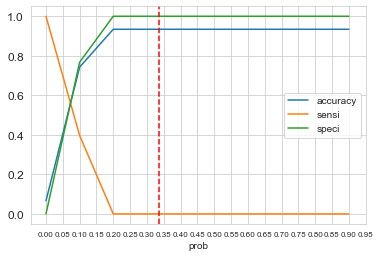

In [207]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

In [208]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1
0,1.0,0.105195,11965,0
1,0.0,0.068182,34641,0
2,0.0,0.050995,12703,0
3,0.0,0.050995,26953,0
4,0.0,0.055637,10497,0


In [209]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1
8954,0.0,0.126789,40632,0,12
7148,0.0,0.126789,4460,0,12
19905,0.0,0.126789,36797,0,12
4896,0.0,0.126789,10834,0,12
15062,0.0,0.126789,31222,0,12
...,...,...,...,...,...
6060,0.0,0.022746,41015,0,2
8698,0.0,0.022746,29265,0,2
9292,0.0,0.022746,29428,0,2
19706,0.0,0.022746,41529,0,2


## Confusion Matrix

In [211]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

Model Accuracy value is              :  93.41 %
Model Sensitivity value is           :  0.0 %
Model Specificity value is           :  100.0 %
Model Precision value is             :  nan %
Model Recall value is                :  0.0 %
Model True Positive Rate (TPR)       :  0.0 %
Model False Positive Rate (FPR)      :  0.0 %
Model Poitive Prediction Value is    :  nan %
Model Negative Prediction value is   :  93.41 %


C:\Users\hp\AppData\Local\Temp\ipykernel_5432\2236530731.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = TP/(TP+FP)
C:\Users\hp\AppData\Local\Temp\ipykernel_5432\2236530731.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  pos_pred_val = TP /(TP+FP)


In [212]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     29711
         1.0       0.00      0.00      0.00      2096

    accuracy                           0.93     31807
   macro avg       0.47      0.50      0.48     31807
weighted avg       0.87      0.93      0.90     31807



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'])))

F1 Score: 0.0


### ROC Curve

In [214]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

### Precision - Recall Trade off

In [224]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

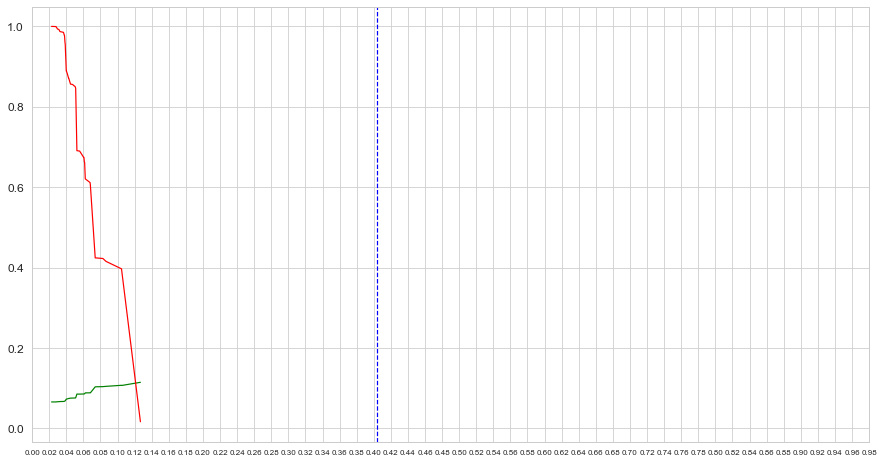

In [225]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

In [226]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1,final_predicted_2
0,1.0,0.105195,11965,0,10,0
1,0.0,0.068182,34641,0,6,0
2,0.0,0.050995,12703,0,5,0
3,0.0,0.050995,26953,0,5,0
4,0.0,0.055637,10497,0,5,0


In [228]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

Model Accuracy value is              :  93.41 %
Model Sensitivity value is           :  0.0 %
Model Specificity value is           :  100.0 %
Model Precision value is             :  nan %
Model Recall value is                :  0.0 %
Model True Positive Rate (TPR)       :  0.0 %
Model False Positive Rate (FPR)      :  0.0 %
Model Poitive Prediction Value is    :  nan %
Model Negative Prediction value is   :  93.41 %


C:\Users\hp\AppData\Local\Temp\ipykernel_5432\2236530731.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = TP/(TP+FP)
C:\Users\hp\AppData\Local\Temp\ipykernel_5432\2236530731.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  pos_pred_val = TP /(TP+FP)


In [229]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     29711
         1.0       0.00      0.00      0.00      2096

    accuracy                           0.93     31807
   macro avg       0.47      0.50      0.48     31807
weighted avg       0.87      0.93      0.90     31807



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evalution : Test Dataset

In [241]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,£60 - £120 Per week,£121 - £180 Per Week,0-0,£181 - £240 Per Week,100,150,£241 - £300 Per week,> 300£ Per Week,200,120,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af,51
10706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Index(['const', '£60 - £120 Per week', '£121 - £180 Per Week', '0-0',
       '£181 - £240 Per Week', '100', '150', '£241 - £300 Per week',
       '> 300£ Per Week', '200', '120',
       '9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af',
       '51'],
      dtype='object')

In [243]:
# Predicting the final test model 
y_test_pred = log_model3.predict(X_test_sm)

In [244]:
#checking the top 10 rows
y_test_pred[:10]

10706    0.105195
30990    0.050995
3142     0.126789
37240    0.050995
30987    0.068182
20499    0.038733
14978    0.062237
42722    0.105195
33544    0.068182
4122     0.061481
dtype: float64

In [245]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
10706,0.105195
30990,0.050995
3142,0.126789
37240,0.050995
30987,0.068182


In [251]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,status
10706,0.0
30990,0.0
3142,0.0
37240,0.0
30987,0.0


In [252]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
0,10706,NaN,0.105195,0,10
1,30990,NaN,0.050995,0,5
2,3142,NaN,0.126789,0,12
3,37240,NaN,0.050995,0,5
4,30987,NaN,0.068182,0,6


In [253]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

In [249]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
3208,18621,NaN,0.126789,0,12
623,3508,NaN,0.126789,0,12
1219,38749,NaN,0.126789,0,12
8445,19852,NaN,0.126789,0,12
9480,16211,NaN,0.126789,0,12
...,...,...,...,...,...
8925,7282,NaN,0.022746,0,2
11553,37975,NaN,0.022746,0,2
4973,45590,NaN,0.022746,0,2
5068,6974,NaN,0.022746,0,2
